In [119]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Population and Job forecasting </div>

<div class="usecase-authors"><b>Authored by: Rhutuvaruni Kharade and Tharusha Chao</div>

<div class="usecase-duration"><b>Duration:</b> 100 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, PowerBI, Tableau</div>
</div>

<div class="usecase-section-header">Scenario</div>

<b>As a citizen and a job seeker, I want to find a job in the field that currently has a lot of demand in this area. </b>
Job seekers are often worried about which jobs are in high demand or in low demand? Which industry will have higher number of jobs in future ? Which areas have highest numbers of jobs based on a particular industry ? Its important for them to know which jobs they should study for and which city has highest concentration of such jobs so they can plan their living and stay in such areas. By understanding the number of jobs based on a cities, job seekers can ensure that they can get a job or live in close vicinity of that job if they live in a particular areas. 

<b>As a business owner I want to establish my business where there is a high demand for my service. I want to make sure that the city I am planning to establish my business in has a higher population so I can attract more customers and potential candidates to work for my company. </b>
Business owners need to know in which city they should establish their company in. This is based on the population of the area. Number of people living in a particular area can motivate business owners to have their business in such locations. This will also attract many job seekers in these places which will help the businesses find the right candidates (employees) to work for them. 



<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will - 
- Learn how to make open the data in the form of pandas dataframe and save it for futher use.
- Have learned how to clean, transform, analyze, visualize data and report outcomes (findings) effectively.
- Use the data to create effective visualization like scatterplots, heatmaps, histograms, etc to aid an understanding of the data to technical and non-technical readers
- using dashboards for effective story telling to both techical and non-technical audiences. 
- Using version control tools to collaborate and contribute to the project//


<div class="usecase-section-header">Introduction</div>

This project focuses on finding the relationship between jobs and population. Jobs in different industry impact the population in the area. This project will look at this impact and will also give reader a brief idea about how population changes with respect to the number of jobs in a particular area. The data is sourced from City of Melbourne Open Data which is open source and will be used throughout this project. The dataset will be cleaned, transformed, analyzed, visualized and finally relevant insights will be reported and documented. These findings will help stakeholders, policy makers and other readers for futher decision making.  


<div class="usecase-section-header">Datasets Used </div>

1 : city-of-melbourne-jobs-forecasts-by-small-area-2020-2040

2 : city-of-melbourne-population-forecasts-by-small-area-2020-2040

<div class="usecase-section-header">Learning Opportunities</div>

ADD

<div class="usecase-section-header">Importing libraries </div>

In [120]:
# importing libraries 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import requests
import os 
import matplotlib.pyplot as plt 
#import missingno as msno



<div class="usecase-section-header">Connecting to Dataset and Testing </div>

In [121]:
#job = pd.read_csv("city-of-melbourne-jobs-forecasts-by-small-area-2020-2040.csv")
job = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-jobs-forecasts-by-small-area-2020-2040/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")
job

,Geography,Year,Category,Industry Space Use,Value
0,City of Melbourne,2023,Jobs by industry,Accommodation,10286
1,City of Melbourne,2026,Jobs by industry,Accommodation,11631
2,City of Melbourne,2032,Jobs by industry,Accommodation,13207
3,City of Melbourne,2034,Jobs by industry,Accommodation,13420
4,City of Melbourne,2035,Jobs by industry,Accommodation,13529
...,...,...,...,...,...
9109,West Melbourne (Residential),2025,Jobs by space use,Total jobs,5454
9110,West Melbourne (Residential),2026,Jobs by space use,Total jobs,5618
9111,West Melbourne (Residential),2029,Jobs by space use,Total jobs,6118
9112,West Melbourne (Residential),2033,Jobs by space use,Total jobs,6717


In [122]:
job.head()

,Geography,Year,Category,Industry Space Use,Value
0,City of Melbourne,2023,Jobs by industry,Accommodation,10286
1,City of Melbourne,2026,Jobs by industry,Accommodation,11631
2,City of Melbourne,2032,Jobs by industry,Accommodation,13207
3,City of Melbourne,2034,Jobs by industry,Accommodation,13420
4,City of Melbourne,2035,Jobs by industry,Accommodation,13529


In [123]:
# to get a basic understanding of variables and null values
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9114 entries, 0 to 9113
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Geography           9114 non-null   object
 1   Year                9114 non-null   int64 
 2   Category            9114 non-null   object
 3   Industry Space Use  9114 non-null   object
 4   Value               9114 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 356.1+ KB


In [124]:
# To see total numbers of rows and columns 
job.shape

(9114, 5)

In [125]:
# Renaming columns for ease, making them all lowercase. 
job = job.rename(columns = {"Geography":"city", "Year":"year", "Category":"category", "Industry Space Use": "industry_space_use", "Value": "value"} )

In [126]:
# In geography columns, to see which unique location it consists of
job.city.unique()

array(['City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne',
       'Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)',
       'North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra',
       'Southbank', 'West Melbourne (Industrial)',
       'West Melbourne (Residential)'], dtype=object)

In [127]:
# to check unique years this data is from
job.year.unique()

array([2023, 2026, 2032, 2034, 2035, 2021, 2025, 2037, 2040, 2027, 2028,
       2036, 2041, 2029, 2031, 2038, 2024, 2030, 2039, 2022, 2033],
      dtype=int64)

In [128]:
# to understand uniqe categories in category columns 
# job.category.unique()
job

,city,year,category,industry_space_use,value
0,City of Melbourne,2023,Jobs by industry,Accommodation,10286
1,City of Melbourne,2026,Jobs by industry,Accommodation,11631
2,City of Melbourne,2032,Jobs by industry,Accommodation,13207
3,City of Melbourne,2034,Jobs by industry,Accommodation,13420
4,City of Melbourne,2035,Jobs by industry,Accommodation,13529
...,...,...,...,...,...
9109,West Melbourne (Residential),2025,Jobs by space use,Total jobs,5454
9110,West Melbourne (Residential),2026,Jobs by space use,Total jobs,5618
9111,West Melbourne (Residential),2029,Jobs by space use,Total jobs,6118
9112,West Melbourne (Residential),2033,Jobs by space use,Total jobs,6717


In [129]:
job.industry_space_use.unique()

array(['Accommodation', 'Admin and support services',
       'Agriculture and mining', 'Arts and recreation services',
       'Business services', 'Construction', 'Education and training',
       'Other services', 'Electricity, gas, water and waste services',
       'Finance and insurance', 'Food and beverage services',
       'Health care and social assistance',
       'Information media and telecommunications', 'Manufacturing',
       'Public administration and safety', 'Real estate services',
       'Rental and hiring services', 'Retail trade',
       'Transport, postal and storage', 'Wholesale trade',
       'Accommodation - Commercial', 'Education',
       'Entertainment - Hospitality', 'Entertainment - Other', 'Health',
       'Industrial', 'Office', 'Other - Employment', 'Retail',
       'Total jobs'], dtype=object)

<div class="usecase-section-header">About Jobs Forecast Dataset. </div>

This dataset provides jobs forecasts by single year for 2021 to 2041. Prepared by SGS Economics and Planning (Jan-Jun 2022), forecasts are available for the municipality and small areas, as well as by industry and space use type. This dataset has total of 9114 rows which indicates total cases and 5 columns which indicate variables(features). The dataset contains the following variables (features): 
    <ul>
        <li> <b>city:</b> Geographical area (Melbourne LGA or small areas used for the City of Melbourne's CLUE analysis). Small areas mostly correspond to traditional suburb boundaries. This is a categorical variable of type <b>object</b>. This variable takes value from the following list of locations: <b> 'City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne','Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)','North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra','Southbank', 'West Melbourne (Industrial)','West Melbourne (Residential)'</b></li><hr>
        <li>
            <b>year:</b> This variables shows the year the job were created. This is a numerical variable of type <b>object</b>. Year is from <b>2022 to 2040</b>. </li><hr>
        <li>
            <b>category:</b> This variables shows the category of the job that was created in that particular year. This is a numerical variable of type <b>object</b>. There are two categories in this variables however we will only look at category by industry.  </li><hr>
        <li>
            <b>industry_space_use:</b> This variables shows the space used by a particular industry that was established in given year. This is a numerical variable of type <b>object</b></li><hr>
        <li>
            <b>value:</b> This variables shows the number of jobs created by a particular industry that was established in given year. This is a numerical variable of type <b>integer</b>  
        </li>
    </ul></i><hr>
</ul>
</p>

In [130]:
#pop = pd.read_csv("city-of-melbourne-population-forecasts-by-small-area-2020-2040.csv")
pop = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-population-forecasts-by-small-area-2020-2040/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")
pop          

,Geography,Year,Gender,Age,Value
0,City of Melbourne,2021,Female,Age 0-4,1943.0
1,City of Melbourne,2023,Female,Age 0-4,2477.0
2,City of Melbourne,2026,Female,Age 0-4,3595.0
3,City of Melbourne,2028,Female,Age 0-4,4083.0
4,City of Melbourne,2034,Female,Age 0-4,5242.0
...,...,...,...,...,...
17047,West Melbourne (Residential),2029,Not applicable,Total population,11673.0
17048,West Melbourne (Residential),2032,Not applicable,Total population,13191.0
17049,West Melbourne (Residential),2035,Not applicable,Total population,14820.0
17050,West Melbourne (Residential),2039,Not applicable,Total population,14794.0


In [131]:
pop.head()

,Geography,Year,Gender,Age,Value
0,City of Melbourne,2021,Female,Age 0-4,1943.0
1,City of Melbourne,2023,Female,Age 0-4,2477.0
2,City of Melbourne,2026,Female,Age 0-4,3595.0
3,City of Melbourne,2028,Female,Age 0-4,4083.0
4,City of Melbourne,2034,Female,Age 0-4,5242.0


In [132]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Geography  17052 non-null  object 
 1   Year       17052 non-null  int64  
 2   Gender     17052 non-null  object 
 3   Age        17052 non-null  object 
 4   Value      16989 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.2+ KB


In [133]:
pop.shape

(17052, 5)

In [134]:
# Renaming columns for ease, making them all lowercase. 
pop = pop.rename(columns = {"Geography":"city", "Year":"year", "Gender":"gender", "Age": "age", "Value": "value"} )

In [135]:
pop.city.unique()

array(['City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne',
       'Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)',
       'North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra',
       'Southbank', 'West Melbourne (Industrial)',
       'West Melbourne (Residential)'], dtype=object)

In [136]:
pop.gender.unique()

array(['Female', 'Male', 'Total', 'Not applicable'], dtype=object)

In [137]:
pop.age.unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85+', 'Average age',
       'Total population'], dtype=object)

In [138]:
pop.year.unique()

array([2021, 2023, 2026, 2028, 2034, 2037, 2038, 2024, 2025, 2040, 2031,
       2033, 2022, 2032, 2036, 2041, 2027, 2029, 2039, 2035, 2030],
      dtype=int64)

In [139]:
pop

,city,year,gender,age,value
0,City of Melbourne,2021,Female,Age 0-4,1943.0
1,City of Melbourne,2023,Female,Age 0-4,2477.0
2,City of Melbourne,2026,Female,Age 0-4,3595.0
3,City of Melbourne,2028,Female,Age 0-4,4083.0
4,City of Melbourne,2034,Female,Age 0-4,5242.0
...,...,...,...,...,...
17047,West Melbourne (Residential),2029,Not applicable,Total population,11673.0
17048,West Melbourne (Residential),2032,Not applicable,Total population,13191.0
17049,West Melbourne (Residential),2035,Not applicable,Total population,14820.0
17050,West Melbourne (Residential),2039,Not applicable,Total population,14794.0


<div class="usecase-section-header">About Population Forecast Dataset. </div>

This dataset provides Population forecasts by single year for 2021 to 2041. Prepared by SGS Economics and Planning (Jan-Jun 2022), forecasts are available for the municipality and small areas, as well as by industry and space use type. This dataset has total of 17052 rows which indicates total cases and 5 columns which indicate variables(features). The dataset contains the following variables (features): 
    <ul>
        <li> <b>city:</b> Geographical area (Melbourne LGA or small areas used for the City of Melbourne's CLUE analysis). Small areas mostly correspond to traditional suburb boundaries. This is a categorical variable of type <b>object</b>. This variable takes value from the following list of locations: <b> 'City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne','Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)','North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra','Southbank', 'West Melbourne (Industrial)','West Melbourne (Residential)'</b></li><hr>
        <li>
            <b>year:</b> This variables shows the year the job were created. This is a numerical variable of type <b>integer</b>. Year is from <b>2022 to 2040</b>. </li><hr>
        <li>
            <b>gender:</b> This variables shows the gender of the person who is a part of the overall population. Gender is divided into four categories: Female, Male, Total and not applicable. This is a categorical nominal variable with type <b>object</b>  </li><hr>
        <li>
            <b>age:</b> This variables shows the age of a person who is a part of the population in this study. This is a numerical variable of type <b>object</b></li><hr>
        <li>
            <b>value:</b> This variables shows the population of the area for a given year. This is a numerical variable of type <b>float</b>  
        </li>
    </ul></i><hr>
</ul>
</p>

<div class="usecase-section-header">Checking and Handling missing values. </div>

<b>For population dataset</b>

In [140]:
# To check if there is any missing values in any columns 
pop.isnull().any()

city      False
year      False
gender    False
age       False
value      True
dtype: bool

In [141]:
# There are no null values in job dataset. However there is null (missing) values in population dataset in value column. 
# Lets find out how many null values are there in value column
print(pop.value.isnull().sum())


# Write more on why you chose to drop rows 

63


In [142]:
# pop

In [143]:
pop = pop.dropna(axis= "rows")

In [144]:
pop.isnull().any()

city      False
year      False
gender    False
age       False
value     False
dtype: bool

<b>All missing values in "value" column of population dataset have been removed.  </b>

In [145]:
# Choose all data where the gender is not applicable
pop = pop.set_index("gender")
other_pop = pop.loc[["Total", "Not applicable"],:]
other_pop                                         # saving total and not applicable data into differnet variable for further use. 
pop = pop.loc[["Female", "Male"],:]               # seperating male and female gender from the whole dataset
pop.reset_index(inplace=True)

In [146]:
pop       # df where gender = ['Male', 'Female']

,gender,city,year,age,value
0,Female,City of Melbourne,2021,Age 0-4,1943.0
1,Female,City of Melbourne,2023,Age 0-4,2477.0
2,Female,City of Melbourne,2026,Age 0-4,3595.0
3,Female,City of Melbourne,2028,Age 0-4,4083.0
4,Female,City of Melbourne,2034,Age 0-4,5242.0
...,...,...,...,...,...
11125,Male,West Melbourne (Residential),2024,Average age,31.0
11126,Male,West Melbourne (Residential),2026,Average age,32.0
11127,Male,West Melbourne (Residential),2027,Average age,32.0
11128,Male,West Melbourne (Residential),2037,Average age,33.0


In [147]:
other_pop    # df where all values from gender = ['total', 'not applicable']
other_pop.reset_index(drop=True)
other_pop

,city,year,age,value
gender,,,,
Total,City of Melbourne,2021,Age 0-4,4051.0
Total,City of Melbourne,2021,Age 20-24,33134.0
Total,City of Melbourne,2021,Age 30-34,21485.0
Total,City of Melbourne,2021,Age 50-54,4939.0
Total,City of Melbourne,2021,Age 65-69,3698.0
...,...,...,...,...
Not applicable,West Melbourne (Residential),2029,Total population,11673.0
Not applicable,West Melbourne (Residential),2032,Total population,13191.0
Not applicable,West Melbourne (Residential),2035,Total population,14820.0


<b>The population dataset now only contains data where the gender is either female or male. Another dataframe has been created to save the data from gender whose value was "Not applicable" and "Total" for futher analysis. </b>

In [148]:
job.isnull().any()

city                  False
year                  False
category              False
industry_space_use    False
value                 False
dtype: bool

In [149]:
job

,city,year,category,industry_space_use,value
0,City of Melbourne,2023,Jobs by industry,Accommodation,10286
1,City of Melbourne,2026,Jobs by industry,Accommodation,11631
2,City of Melbourne,2032,Jobs by industry,Accommodation,13207
3,City of Melbourne,2034,Jobs by industry,Accommodation,13420
4,City of Melbourne,2035,Jobs by industry,Accommodation,13529
...,...,...,...,...,...
9109,West Melbourne (Residential),2025,Jobs by space use,Total jobs,5454
9110,West Melbourne (Residential),2026,Jobs by space use,Total jobs,5618
9111,West Melbourne (Residential),2029,Jobs by space use,Total jobs,6118
9112,West Melbourne (Residential),2033,Jobs by space use,Total jobs,6717


<b>There are no missing values in job dataset hence we do not need to perfrom any operations to remove null or missing values. However the industry_space_use column has values where the industry is "Total jobs" which is not accurate so we will remove the rows where the column has such values and reserve it in a different variable for later analysis. </b>

In [150]:
total_job_by_ind_space_use = job.set_index("industry_space_use").loc[['Total jobs'], : ]
job = job.set_index("industry_space_use").loc[['Accommodation', 'Admin and support services',
       'Agriculture and mining', 'Arts and recreation services',
       'Business services', 'Construction', 'Education and training',
       'Other services', 'Electricity, gas, water and waste services',
       'Finance and insurance', 'Food and beverage services',
       'Health care and social assistance',
       'Information media and telecommunications', 'Manufacturing',
       'Public administration and safety', 'Real estate services',
       'Rental and hiring services', 'Retail trade',
       'Transport, postal and storage', 'Wholesale trade',
       'Accommodation - Commercial', 'Education',
       'Entertainment - Hospitality', 'Entertainment - Other', 'Health',
       'Industrial', 'Office', 'Other - Employment', 'Retail'],:]
job

,city,year,category,value
industry_space_use,,,,
Accommodation,City of Melbourne,2023,Jobs by industry,10286
Accommodation,City of Melbourne,2026,Jobs by industry,11631
Accommodation,City of Melbourne,2032,Jobs by industry,13207
Accommodation,City of Melbourne,2034,Jobs by industry,13420
Accommodation,City of Melbourne,2035,Jobs by industry,13529
...,...,...,...,...
Retail,West Melbourne (Residential),2028,Jobs by space use,405
Retail,West Melbourne (Residential),2031,Jobs by space use,433
Retail,West Melbourne (Residential),2032,Jobs by space use,443


In [151]:
total_job_by_ind_space_use

,city,year,category,value
industry_space_use,,,,
Total jobs,City of Melbourne,2022,Jobs by industry,473514
Total jobs,City of Melbourne,2023,Jobs by industry,483587
Total jobs,City of Melbourne,2026,Jobs by industry,519577
Total jobs,City of Melbourne,2027,Jobs by industry,530590
Total jobs,City of Melbourne,2030,Jobs by industry,563548
...,...,...,...,...
Total jobs,West Melbourne (Residential),2025,Jobs by space use,5454
Total jobs,West Melbourne (Residential),2026,Jobs by space use,5618
Total jobs,West Melbourne (Residential),2029,Jobs by space use,6118


<b>Now we only have job data where each industry belongs to a speceific category and not "Total jobs" category. Howevrer, the data from "total jobs" category is saved as dataframe for futher analysis. </b>

In [152]:
job= job.reset_index()

In [153]:
job.shape

(8526, 5)

In [154]:
pop.shape

(11130, 5)

<div class="usecase-section-header">Exploratory Data Analysis on Job Dataset. </div>

In [155]:
# changing data types of the variables if they are not accurate 
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   industry_space_use  8526 non-null   object
 1   city                8526 non-null   object
 2   year                8526 non-null   int64 
 3   category            8526 non-null   object
 4   value               8526 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 333.2+ KB


In [156]:
job

,industry_space_use,city,year,category,value
0,Accommodation,City of Melbourne,2023,Jobs by industry,10286
1,Accommodation,City of Melbourne,2026,Jobs by industry,11631
2,Accommodation,City of Melbourne,2032,Jobs by industry,13207
3,Accommodation,City of Melbourne,2034,Jobs by industry,13420
4,Accommodation,City of Melbourne,2035,Jobs by industry,13529
...,...,...,...,...,...
8521,Retail,West Melbourne (Residential),2028,Jobs by space use,405
8522,Retail,West Melbourne (Residential),2031,Jobs by space use,433
8523,Retail,West Melbourne (Residential),2032,Jobs by space use,443
8524,Retail,West Melbourne (Residential),2033,Jobs by space use,452


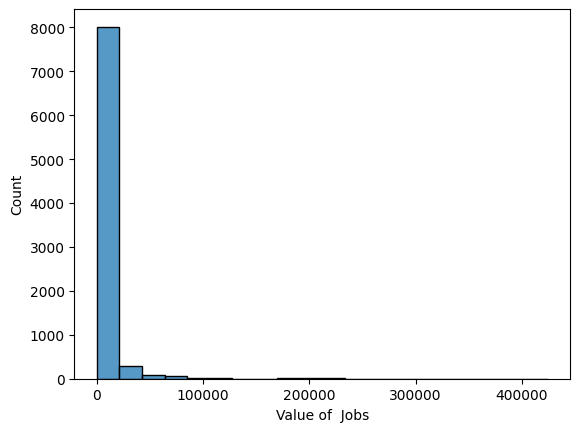

<Figure size 1000x1000 with 0 Axes>

In [157]:
# Hisotgram of jobs with 20 bins 
sns.histplot(job.value,bins=20)
plt.xlabel("Value of  Jobs")
plt.figure(figsize=(10,10))
plt.show()

In [158]:
max(job.value)

424483

In [159]:
min(job.value)

0

<Axes: xlabel='value', ylabel='Count'>

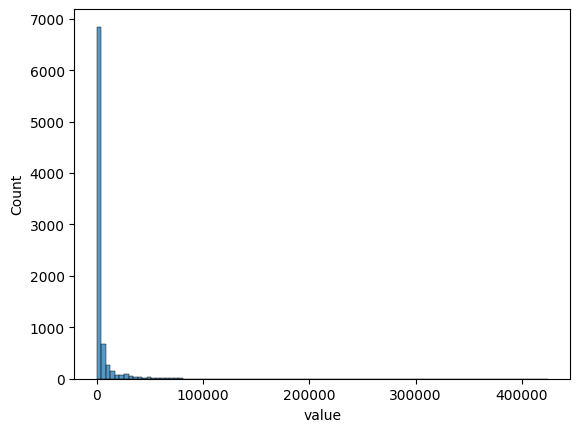

In [160]:
# increasing bin size to see any major change 
sns.histplot(job.value, bins=100)

Most jobs have values in between the range of 0 to 25000. Around 8000 jobs exist between where the values of the jobs are between 0 and 25000. There are no jobs in whose values are in 300000 to 400000. There are some jobs where the value of job is between 175000 and 200000. 424483 is the highest value of job in a particular category while 0 is the lowest. We see the same insights with different bin sizes. 

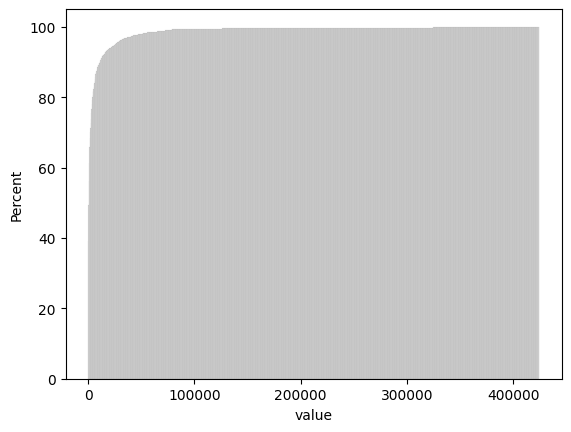

In [161]:
# Cumulative Counts and Empirical Cumulatie ditribution Function 
sns.histplot(job.value,stat="percent", cumulative=True, color="lightgray")
plt.show()

From the above graph we see that 90% of all jobs were created by categories with no more than 25000 number of jobs (value valriable in job dataset).  

In [162]:
np.mean(job.value)

5598.599577762139

The mean of the values which is the number of jobs created by particular category is 5598. Mean tells us that the average number of total jobs created is 5598. 

In [163]:
np.median(job.value)

566.5

In [164]:
# std indicates that the data is spread father/closer to the mean
np.std(job.value)

23443.075916920792

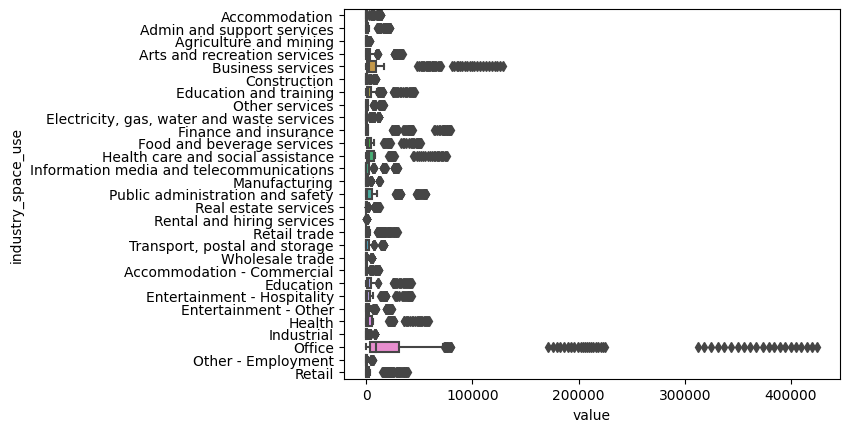

<Figure size 10000x10000 with 0 Axes>

In [165]:
sns.boxplot(x=job.value, y=job.industry_space_use, data=job )
plt.figure(figsize=(100,100))
plt.show()

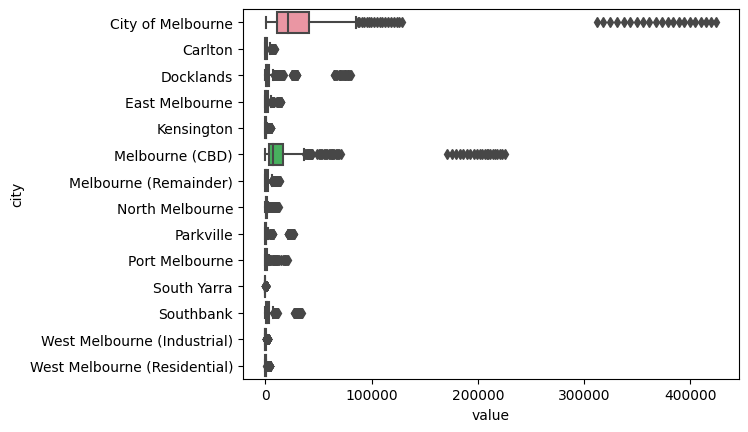

<Figure size 10000x10000 with 0 Axes>

In [166]:
sns.boxplot(x=job.value, y=job.city, data=job )
plt.figure(figsize=(100,100))
plt.show()

In [177]:
# Lets look at the data by city - City of Melbourne
com_data = (job
    .loc[job.city.isin(["City of Melbourne"])])
com_data

,industry_space_use,city,year,category,value
0,Accommodation,City of Melbourne,2023,Jobs by industry,10286
1,Accommodation,City of Melbourne,2026,Jobs by industry,11631
2,Accommodation,City of Melbourne,2032,Jobs by industry,13207
3,Accommodation,City of Melbourne,2034,Jobs by industry,13420
4,Accommodation,City of Melbourne,2035,Jobs by industry,13529
...,...,...,...,...,...
8349,Retail,City of Melbourne,2034,Jobs by space use,34416
8351,Retail,City of Melbourne,2036,Jobs by space use,36031
8352,Retail,City of Melbourne,2037,Jobs by space use,36678
8353,Retail,City of Melbourne,2038,Jobs by space use,37326


In [223]:
# How many jobs were created by each industry in city of melbourne?
data = (com_data
        .loc[com_data.year>2023, ["industry_space_use", "year", "value"]]
        .set_index("industry_space_use")
        .sort_values("year")

       )
data

,year,value
industry_space_use,,
Public administration and safety,2024,48038
Education,2024,26674
Business services,2024,86943
Admin and support services,2024,17343
Wholesale trade,2024,5752
...,...,...
Retail trade,2041,29782
Admin and support services,2041,22837
Information media and telecommunications,2041,30232


<Axes: xlabel='year', ylabel='value'>

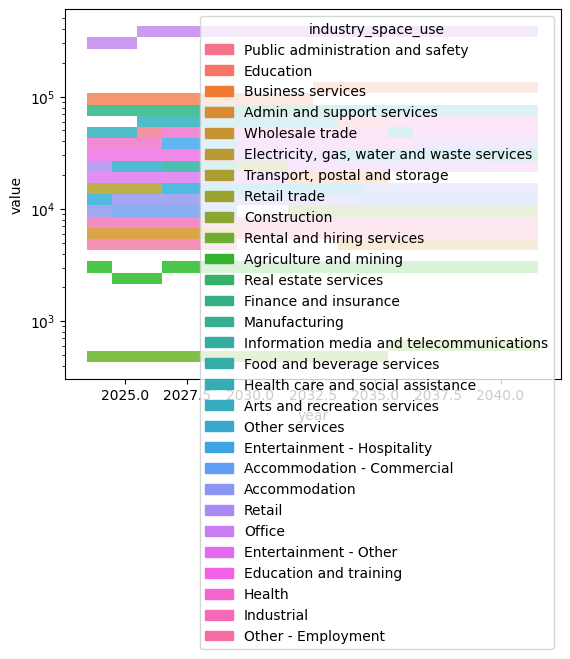

In [241]:
sns.histplot(data=data, x = "year", y = "value", hue="industry_space_use", bins=30, , log_scale=(False, True))

<div class="usecase-section-header">Exploratory Data Analysis on Population Dataset. </div>

<div class="usecase-section-header">References</div>
<ul>
    <li> https://pandas.pydata.org/docs/reference/api/pandas.unique.html </li>
    <li>https://note.nkmk.me/en/python-pandas-nan-extract/#:~:text=You%20can%20use%20the%20isnull,a%20missing%20value%20or%20not.&text=isnull()%20is%20an%20alias,and%20both%20are%20used%20interchangeably.</li>
    <li>https://www.kaggle.com/code/malanep/finding-and-visualizing-missing-data-in-python</li>
    <li>https://libraries.io/pypi/missingno</li>
    <li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html</li>
    <li>https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra</li>

</ul>

<h3> Rhuth's Work Above </h3>
<h1>MAIN SECTION </h1> 
<h3> Tharusha's Work Below </h3>

In [167]:
print(pop.columns)


Index(['gender', 'city', 'year', 'age', 'value'], dtype='object')


### Simple Visual of the Population against the Year with Color/ Hue corresponding to the male and female population

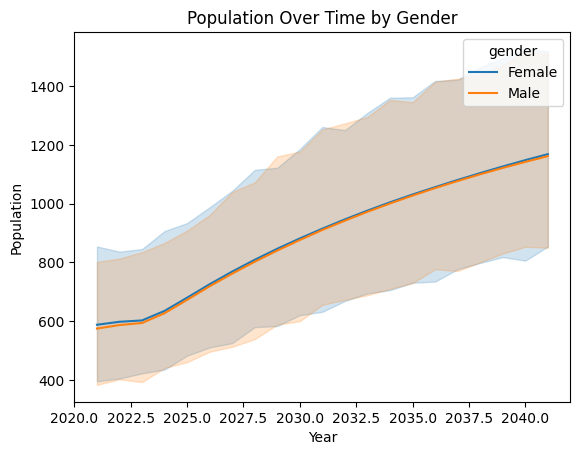

In [168]:
#Visual

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(data=pop, x='year', y='value', hue='gender')
plt.title('Population Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

### Scatter Plot 

In [169]:
sns.scatterplot(data=df, x='year', y='value', hue='gender')
plt.title('Population Scatter Plot Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

NameError: name 'df' is not defined